<a href="https://colab.research.google.com/github/amiya2001/Capstone-Project/blob/main/Copy_of_Sample_EDA_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



:##### **Project Type**    - EDA
##### **Contribution**    - Team
##### **Team Member 1 -**Mayank Gudadhe
##### **Team Member 2 -**Vishal Singh Sangral
##### **Team Member 3 -**kiran Mundhe
##### **Team Member 4 -**Nipu Mishra

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from wordcloud import WordCloud,STOPWORDS

### Dataset Loading

In [5]:
#mount to Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Load Dataset

path='/content/drive/MyDrive/Almabetter /cohart santa/Capstone project 1/'
playstore_df=pd.read_csv(path+'Play Store Data.csv')
userreview_df=pd.read_csv(path+'User Reviews.csv')

### Dataset First View

In [7]:
# Dataset First Look

playstore_df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
userreview_df.head(20)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000


### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
rows_of_playstore_df=len(playstore_df.axes[0])
rows_of_userreview_df=len(userreview_df.axes[0])
column_of_playstore_df=len(playstore_df.axes[1])
column_of_userreview_df=len(userreview_df.axes[1])
print(f"Numbers of Rows in playstore_df are  {rows_of_playstore_df}")
print(f"Numbers of column in playstore_df are  {column_of_playstore_df}")
print()
print(f"Numbers of Rows in userreview_df are  {rows_of_userreview_df}")
print(f"Numbers of column in userreview_df are  {column_of_userreview_df}")

Numbers of Rows in playstore_df are  10841
Numbers of column in playstore_df are  13

Numbers of Rows in userreview_df are  64295
Numbers of column in userreview_df are  5


### Dataset Information

In [10]:
# Dataset Info

playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [11]:
userreview_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
playstore_df[~playstore_df.duplicated()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [13]:
userreview_df[~userreview_df.duplicated()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
...,...,...,...,...,...
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000
64230,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",Negative,-0.316667,0.400000


#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count

playstore_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [15]:
userreview_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

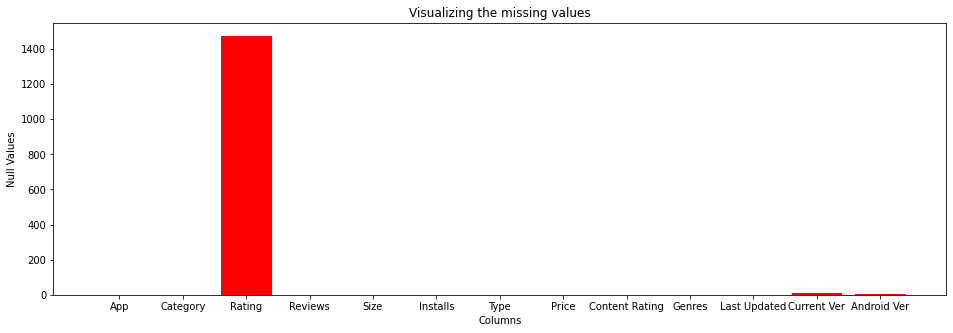

In [16]:
# Visualizing the missing values
figure=plt.figure(figsize=(16,5))
plt.bar(list(playstore_df.columns),list(playstore_df.isnull().sum()),color='red')
plt.xlabel("Columns")
plt.ylabel("Null Values")
plt.title("Visualizing the missing values")
plt.show()

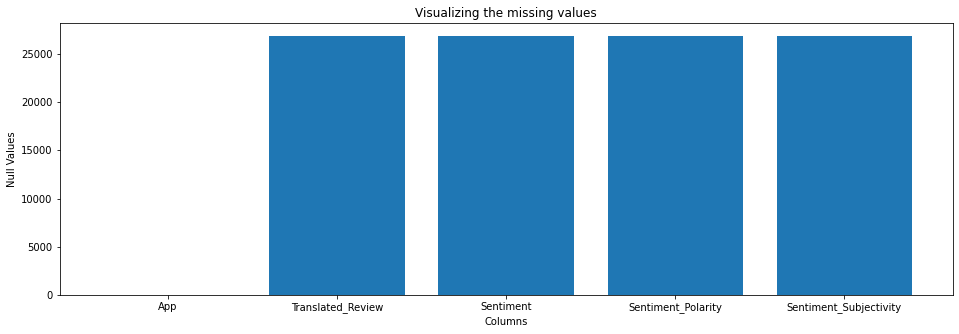

In [17]:
figure=plt.figure(figsize=(16,5))
plt.bar(list(userreview_df.columns),list(userreview_df.isnull().sum()))
plt.xlabel("Columns")
plt.ylabel("Null Values")
plt.title("Visualizing the missing values")
plt.show()

### What did you know about your dataset?

**1.** After reviewing the data set I saw that there are 10841 rows and 13 columns in the play store Data.csv file.

**2.** Many of the columns in that dataset doesn't have the right data types,the price column has the type 'object' but the column element in that column is numeric type so we have to change that type to int or float. Similarly, there is some column which does not have the right type so we have to change them.

**3.** After removing the duplicate value we saw that the total no of rows is 10358 which means we have many duplicate rows in the dataset.

**4.** After counting the null/missing value and visualizing the data we saw that there are 5 columns consist null values that are __'Rating'__, __'Type'__,   __' Content Rating'__, __'Current ver'__ and __' Android ver'__. Among these 5 column __Rating__ column have the highest number of null values and __Type and Content Rating__ column have the less number of null values.

**5.** In the case of the User Reviews dataset, we saw there are 64295 numbers of rows and 5 columns in the dataset.

**6.** The type of all the variables is in the correct form so no need to change that.

**7.** In the whole data set, there are 30679 non-duplicated rows present which means there are so many duplicate rows present in the dataset,
and also after counting the null value and visualizing the dataset, we found that every column have numbers of null values except the 'app' column, if we calculate the percentage then it's almost **42%** of the total rows present in every column  

## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns
playstore_df.columns


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [19]:
userreview_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [20]:
# Dataset Describe
playstore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [21]:
userreview_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


### Variables Description 

__1.__ After finding the number of columns present in the data set we saw that there are 13 columns in the dataset but when we call describe method it only gives us the description of  one column cause describe method only describes the numeric type column .so we have to change the type of some column like **reviews**, **size**, **install**, **price**, etc.

**2.** If we talk about rating then this column has a total of 9367 numbers of non-null values as we saw in the information cell. Mean rating is 4.1, the lowest rating is 1 star and the highest is 19 but we know that in the case of rating, a person can't rate 19 so we have to change this otherwise remove this column for better analysis. 

**3.** In the case of the user review data frame, there are 5 columns, after calling the _**describe()**_  method we saw that the **'sentiment_polarity'** consists of values in between -1 to 1 and the **'sentiment_subjectivity'** lies between 0 to 1. 



### Check Unique Values for each variable.

In [22]:
# Check number of Unique Values for each variable.
playstore_df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [23]:
#checking unique values in 'App' column
playstore_df.App.unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [24]:
#checking unique values in 'Category' column
playstore_df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [25]:
#checking unique values in 'Rating' column
playstore_df.Rating.unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [26]:
#checking unique values in 'Reviews' column
playstore_df.Reviews.unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [27]:
#checking unique values in 'Size' column
playstore_df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [28]:
#checking unique values in 'Installs' column
playstore_df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [29]:
#checking unique values in 'Type' column
playstore_df.Type.unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [30]:
#checking unique values in 'Price' column
playstore_df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [31]:
#checking unique values in 'Content Rating' column
playstore_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [32]:
#checking unique values in 'Genres' column
playstore_df.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [33]:
#checking unique values in 'Last Updated' column
playstore_df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [34]:
#checking unique values in 'Current Ver' column
playstore_df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [35]:
#checking unique values in 'Android Ver' column
playstore_df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [36]:
# Check number of Unique Values for each variable.
userreview_df.nunique()

App                        1074
Translated_Review         27994
Sentiment                     3
Sentiment_Polarity         5410
Sentiment_Subjectivity     4474
dtype: int64

In [37]:
#checking unique values in 'App' column
userreview_df.App.unique()

array(['10 Best Foods for You', '104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室',
       '11st', ..., 'Hotwire Hotel & Car Rental App',
       'Housing-Real Estate & Property', 'Houzz Interior Design Ideas'],
      dtype=object)

In [38]:
#checking unique values in 'Translated_Review' column
userreview_df.Translated_Review.unique()

array(['I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"',
       'This help eating healthy exercise regular basis', nan, ...,
       'Dumb app, I wanted post property rent give option. Website work. Waste time space phone.',
       'I property business got link SMS happy performance still guys need raise bar guys Cheers',
       'Useless app, I searched flats kondapur, Hyderabad . None number reachable I know flats unavailable would keep posts active'],
      dtype=object)

In [39]:
#checking unique values in 'Sentiment' column
userreview_df.Sentiment.unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [40]:
#checking unique values in 'Sentiment_Polarity' column
userreview_df.Sentiment_Polarity.unique()

array([ 1.        ,  0.25      ,         nan, ..., -0.52857143,
       -0.37777778,  0.17333333])

In [41]:
#checking unique values in 'Sentiment_Subjectivity' column
userreview_df.Sentiment_Subjectivity.unique()

array([0.53333333, 0.28846154,        nan, ..., 0.51145833, 0.7172619 ,
       0.2594697 ])

**1.** After calling the __nunique()__ method which gives us the number of unique values present in a particular column, we found that there is a total of 9660 unique apps present in the data frame and it is divided into 40 unique categories .

**2.** There is 3 type of unique values present in the  __'Type'__ columnn  but we know that there is only 2 type of apps we use that is paid or free but  we have a extra value present in the type columns , so we have to replace or remove that one. 

**3.** After checking the unique values in the __'Size'__ column we found that all the value contain _'M'_ and _'K'_ in it __(M for MB and K for KB)__ and also contain a unique value named __'varies with device'__, so in the data cleaning section we have to remove that _'M_' and _'K'_ and convert all the values in __MB__ form and there is no need to change the __'varies with device'__ value.

**4.** Like __'Size'__ column  __'Install'__ column has '+'and ',' symbol in it and also the __'Price'__ column has __Dollar__ symbol in it, so for changing the dtype we have to remove the '+' and ',' symbolfrom Installs Column and __'$'__ symbol from __'Price '__Column

**5.** In content rating, there are 6 unique values and null values 

**6.**In the case of the user review data set, there is a total of 1074 unique apps .that means a lot of people give their opinion about these apps only so we can say a lot of people use these apps, and there are 3 types of sentiments that are positive, negative and neutral. 


## 3. ***Data Wrangling***

### Data Wrangling Code

In [42]:
# Write your code to make your dataset analysis ready.
#first dealing with the null values
playstore_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [43]:
# dealing with column content lesser number of null values.
playstore_df[playstore_df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [44]:
playstore_df['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [45]:
playstore_df[playstore_df['Type'] =='0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [46]:
# replacing the null value with 'free' cause price is 0
playstore_df.loc[9148,'Type']='Free'
playstore_df.loc[9148,:]

App               Command & Conquer: Rivals
Category                             FAMILY
Rating                                  NaN
Reviews                                   0
Size                     Varies with device
Installs                                  0
Type                                   Free
Price                                     0
Content Rating                 Everyone 10+
Genres                             Strategy
Last Updated                  June 28, 2018
Current Ver              Varies with device
Android Ver              Varies with device
Name: 9148, dtype: object

In [47]:
#deal with 'Android ver' column
playstore_df[playstore_df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [48]:
# droping the three rows
playstore_df.drop([4453,4490,10472],inplace=True)

In [49]:
#again checking the null value count
playstore_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          0
dtype: int64

In [50]:
# dealing with 'Current Ver' column
playstore_df[playstore_df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [51]:
playstore_df=playstore_df[~playstore_df['Current Ver'].isnull()]

In [52]:
playstore_df.isnull().sum()

App                  0
Category             0
Rating            1470
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [53]:
#dealing with the rating column
playstore_df[playstore_df.Rating.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [54]:
# replace the null value to the median
mean_of_rating=round(playstore_df[~playstore_df.Rating.isnull()].Rating.mean(),1)
mean_of_rating

4.2

In [55]:
playstore_df.Rating.fillna(value=mean_of_rating,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [56]:
#checking null value count
playstore_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [57]:
#checking the shape of data frame
playstore_df.shape

(10830, 13)

In [58]:
# now correct the dtype of some variables
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10830 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10830 non-null  object 
 1   Category        10830 non-null  object 
 2   Rating          10830 non-null  float64
 3   Reviews         10830 non-null  object 
 4   Size            10830 non-null  object 
 5   Installs        10830 non-null  object 
 6   Type            10830 non-null  object 
 7   Price           10830 non-null  object 
 8   Content Rating  10830 non-null  object 
 9   Genres          10830 non-null  object 
 10  Last Updated    10830 non-null  object 
 11  Current Ver     10830 non-null  object 
 12  Android Ver     10830 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [59]:
# change the type of 'Reviews' column
playstore_df=playstore_df.astype({'Reviews':int})
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10830 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10830 non-null  object 
 1   Category        10830 non-null  object 
 2   Rating          10830 non-null  float64
 3   Reviews         10830 non-null  int64  
 4   Size            10830 non-null  object 
 5   Installs        10830 non-null  object 
 6   Type            10830 non-null  object 
 7   Price           10830 non-null  object 
 8   Content Rating  10830 non-null  object 
 9   Genres          10830 non-null  object 
 10  Last Updated    10830 non-null  object 
 11  Current Ver     10830 non-null  object 
 12  Android Ver     10830 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [60]:
# function for removing 'M'  and 'k' 
def k_m(size):
  
    if 'M' in size:
      size=float(size[:-1])
      return size
    elif 'k' in size:
      size=round(float(size[:-1])/1024,4)
      return size
    else:
      return size

In [61]:
# removing 'M' and 'k' from Size column
playstore_df.Size=playstore_df.Size.apply(lambda x :k_m(x))


In [62]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [63]:

# function for removing '+' and ',' from install column
def replace(char):
  new_char=char
  count=char.count(',')
  if ',' in char:
    new_char=char.replace(',','')
  if '+' in new_char:
    new_char=int(new_char[:-1])
    return new_char
  else:
    return int(new_char)

In [64]:
#replace the ',' and '+' and change the dtype
playstore_df.Installs =playstore_df.Installs.apply(lambda x:replace(x))

In [65]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [66]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10830 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10830 non-null  object 
 1   Category        10830 non-null  object 
 2   Rating          10830 non-null  float64
 3   Reviews         10830 non-null  int64  
 4   Size            10830 non-null  object 
 5   Installs        10830 non-null  int64  
 6   Type            10830 non-null  object 
 7   Price           10830 non-null  object 
 8   Content Rating  10830 non-null  object 
 9   Genres          10830 non-null  object 
 10  Last Updated    10830 non-null  object 
 11  Current Ver     10830 non-null  object 
 12  Android Ver     10830 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 1.2+ MB


In [67]:
#Reviewing the price column which have paid type
playstore_df[playstore_df['Price'] !='0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000,Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,4.2,17,0.1533,100,Paid,$0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4,1000,Paid,$7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11.0,10000,Paid,$16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up
10785,"sugar, sugar",FAMILY,4.2,1405,9.5,10000,Paid,$1.20,Everyone,Puzzle,"June 5, 2018",2.7,2.3 and up


In [68]:
#function for removing dolar sign
def remove_dollar(price):
  new_price=price
  if '$' in price:
    new_price=price.replace('$','')
    return float(new_price)
  else:
    return float(new_price)

In [69]:
#removing the dollar and changing the dtype of price column
playstore_df.Price=playstore_df.Price.apply(lambda x : remove_dollar(x))

In [70]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10830 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10830 non-null  object 
 1   Category        10830 non-null  object 
 2   Rating          10830 non-null  float64
 3   Reviews         10830 non-null  int64  
 4   Size            10830 non-null  object 
 5   Installs        10830 non-null  int64  
 6   Type            10830 non-null  object 
 7   Price           10830 non-null  float64
 8   Content Rating  10830 non-null  object 
 9   Genres          10830 non-null  object 
 10  Last Updated    10830 non-null  object 
 11  Current Ver     10830 non-null  object 
 12  Android Ver     10830 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.2+ MB


In [71]:
playstore_df['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [72]:
#changing and coverting the element of 'Last Update' column into date time
playstore_df['Last Updated']=playstore_df['Last Updated'].apply(lambda x: dt.strptime(x,'%B %d, %Y'))

In [73]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10830 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10830 non-null  object        
 1   Category        10830 non-null  object        
 2   Rating          10830 non-null  float64       
 3   Reviews         10830 non-null  int64         
 4   Size            10830 non-null  object        
 5   Installs        10830 non-null  int64         
 6   Type            10830 non-null  object        
 7   Price           10830 non-null  float64       
 8   Content Rating  10830 non-null  object        
 9   Genres          10830 non-null  object        
 10  Last Updated    10830 non-null  datetime64[ns]
 11  Current Ver     10830 non-null  object        
 12  Android Ver     10830 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 1.2+ MB


In [74]:
#lets remove the duplicate values
playstore_df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
8 Ball Pool                                           7
ESPN                                                  7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9649, dtype: int64

In [75]:
playstore_df.drop_duplicates('App',inplace=True)

In [76]:
playstore_df['App'].value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook    1
INFAMY RO                                         1
Ck Coif                                           1
CONTRACT KILLER: ZOMBIES                          1
CK Shop                                           1
                                                 ..
Block City Wars + skins export                    1
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9649, dtype: int64

In [77]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   int64         
 4   Size            9649 non-null   object        
 5   Installs        9649 non-null   int64         
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 1.0+ MB


In [78]:
playstore_df.describe()

,Rating,Reviews,Installs,Price
count,9649.000000,9.649000e+03,9.649000e+03,9649.000000
mean,4.177355,2.168145e+05,7.785404e+06,1.100079
std,0.494541,1.832255e+06,5.378557e+07,16.860857
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,1.000000e+03,0.000000
50%,4.200000,9.690000e+02,1.000000e+05,0.000000
75%,4.500000,2.944500e+04,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [79]:
# code for Use Review Dataset
userreview_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [80]:
userreview_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [81]:
#checking the null values in 'Translated_Review ' column
userreview_df[userreview_df.Translated_Review.isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [82]:
#checking the null values in '	Sentiment ' column
userreview_df[userreview_df.Sentiment.isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [83]:
#checking the rows which have null value in '	Translated_Review' and non null value in  'Sentiment'
userreview_df[userreview_df.Translated_Review.isnull() & ~userreview_df['Sentiment'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In [84]:

#checking the rows which have null value in '	Sentiment' and non null value in  'Translated_Review'
userreview_df[userreview_df.Sentiment.isnull() & ~userreview_df['Translated_Review'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity


In [85]:
#dropping all the null values in the data
userreview_df.dropna(inplace=True)

In [86]:
userreview_df.shape

(37427, 5)

In [87]:
userreview_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [88]:
userreview_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


### What all manipulations have you done and insights you found?

  ### __For Play Store Data__
  **1.** So in this data wrangling section at first we clean and do some 
  changes in the play store dataset and after that we do the same with 
  user review dataset.

  **2.** In the case of the play store Dataset,first we deal with the null values 
  present in every column.

  **3.** In the previous, we use the ___isnull()___ and ___sum()___
  method to know exactly how many null values present in every column 
  and we found that there is only 1 null value present in both __'Type'__ 
  and __'Content Rating'__ column,8 null values present in the __'Current Ver'__ 
  column,3 null value is in the __'Android Ver'__ column and the highest no of null values (that is 1474) are in the __'Rating'__ column.

  **4.** Firstly we deal with the columns having a lesser number of null values
  that is __'Type'__ and __'Content Rating'__, so in the Type column we saw that there  is 3 unique values (that is free, paid, and 0), there are 10039 numbers of 'Free'  type,800 number 'Paid' type and only one '0' type but we know that zero is not a type and if we analyze that column only, then we also saw that 
  in the same row, the __'Rating'__ column has '19.0' as a value, and we know 
  that is not the right value that means this row is an outlier and also 
  both __'Content Rating'__ and __'Android Ver'__ have null values so we have to 
  remove this row permanently.

  **5.** So for the type column, the null value will replace with the value 'Free' cause the most number of apps are 'Free' type.  

  **6.**  After the __'Type'__ column, we have to deal with the Android ver column, and as we know previously that there are only 3 null values present in the Android Ver column.

  **7.** After deeply analyzing that column we find that we can't replace the null values with the ___mean___ or ___median___, and also the outlier row which we find when we analyze the __'Type'__ column also present there so we have to remove all these 3 columns from the dataset.
  **8.**  we use the pandas ___drop()___ method for removing these columns and set ___'iplace=True'___ for permanent changes in the data frame.

  **9.** Now if we call ___isnull()___ and ___sum()___ methods we can see that only the __'Rating'__ and __'Current Ver'__ columns have null values.
  now we have to deal with these 2 columns.

  **10.** In the case of the __'Current Ver'__ column we have to remove all the rows containing null values cause like the __'Android Ver'__ column we can't replace the null value of __'Current Ver'__ with the mean or median.

  **11.** After dropping all null values we have only one column which contains the null values that are in The __'Rating'__ column. As we can see there are 1470 numbers  of null values in this column, so we can't just remove these rows cause it's a very huge amount of data. so we have to replace these data with the mean of the column.

  **12.** For finding the mean of the column we use the mean() function with nonnull values of that column.After finding the mean we replace all the null values with the mean.

  **13.** After these operations we can see there is no null value present in the data frame and we got 10830 rows and 13 columns.

  **14.** After null values, we have to work on the ___dtype___ of all columns, so as we have seen previously that there are some columns (like Reviews, Size, Installs, Price, and Last updated) which needs some changes.

  **15.** Firstly for the __'Reviews'__ column, we know that it contains numeric type data so we have to change the ___dtype___ of this column .for changing _dtype_ we use ___astype()___ method. 

  **16.** After the __'Reviews'__ column, we find that the __'Size'__ column consists of data in __mb__ and __kb__ format __(m for mb and k for kb)__ so we have to remove the __'m'__ and __'k'__ sign from the data and convert the data to mb if it is in kb. for that we write a function that takes the data of the __'Size'__ column as an argument and returns the data without __'m'__ and __'k'__ signs.

  **17.** After writing the function we pass the __'Size'__ column 
  inside the __lambda__ function with the help of ___apply()___ method and stored the new
  value in place of old values.

  **18.** After this operation, if we call the __head()__ method 
  and we can see that the __'Size'__ column contains the new value without __'m'__ and __'k'__ sign and all the kb data is converted into mb.

  **19.** Like size column __'Install'__ column have some 
  special symbols like __'+'__ and __','__, so for removing that symbol and converting the __dtype__ we write a function named ___replace___ which takes the data of the __'Install'__ column as an argument and returns the same data without __'+'__ and __','__ symbol and __int__ 
  type. like __'Size'__, we pass the __'Install'__ column inside the __lambda__ function using ___apply()___ method and got the column updated .

  **20.** Now if we call the ___info()___ method we can see 
  that the values in the __'Install'__ column got updated and the ___dtype___ is also changed.

  **21.** After the __'Size'__ and __'Install'__ column it's time for the __'Price'__ column, so for the __'Price'__ column ,first we check how many rows there ,which have some price, and then we found
  that there is __797__ row that has some price, not __0__, and also one more thing we found that all these data contain a __Dollar__ symbol in it so we have to remove the __Dollar__ symbol for changing the ___dtype___. for that, we write  a function named ___'remove_dollar'___ which takes the values of the __'Price'__ column as an argument and return the same value with __float__ type and without ___'$'___ symbol.

  **22.** Like __'Size'__ and __'Install'__ we use ___apply ()___ method and __lambda__ function to do this operation.

  **23.**  At last, We changed the type of the __'Last Updated'__ column from object to 
  datetime by using ___datetime.strptime ()___ function inside the __lambda__ function and use ___apply()___ method on it.

  **24.**Now if we call the ___info()___ method then we can see that all the columns mention above is updated with its ___dtype___ and values

### __For User Review Data__
    
**1.** In the case of the ___user review___ data set, we know that there are many null values present in every column except the __'App'__ column.

**2.** After checking the null values we saw that if the __'Translated_Review'__ column has a null value then the __'Sentiment'__,
__'Sentiment_Polarity'__ and __'Sentiment_subjectivity'__ columns also have null values

**3.**This happens because of the unavailability of reviews, If a person did not give any review then it's impossible to find the __'Sentiment'__, __'Sentiment_polarity'__
and __'Sentiment_subjectivity'__, but we found some exception data in the data frame which didn't follow this rule so we have to delete all the rows consist null values because we don't want that rows which didn't have any review.

**4.**After deletingthe null values there are only ___37427___ data present in our data frame.  
    

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

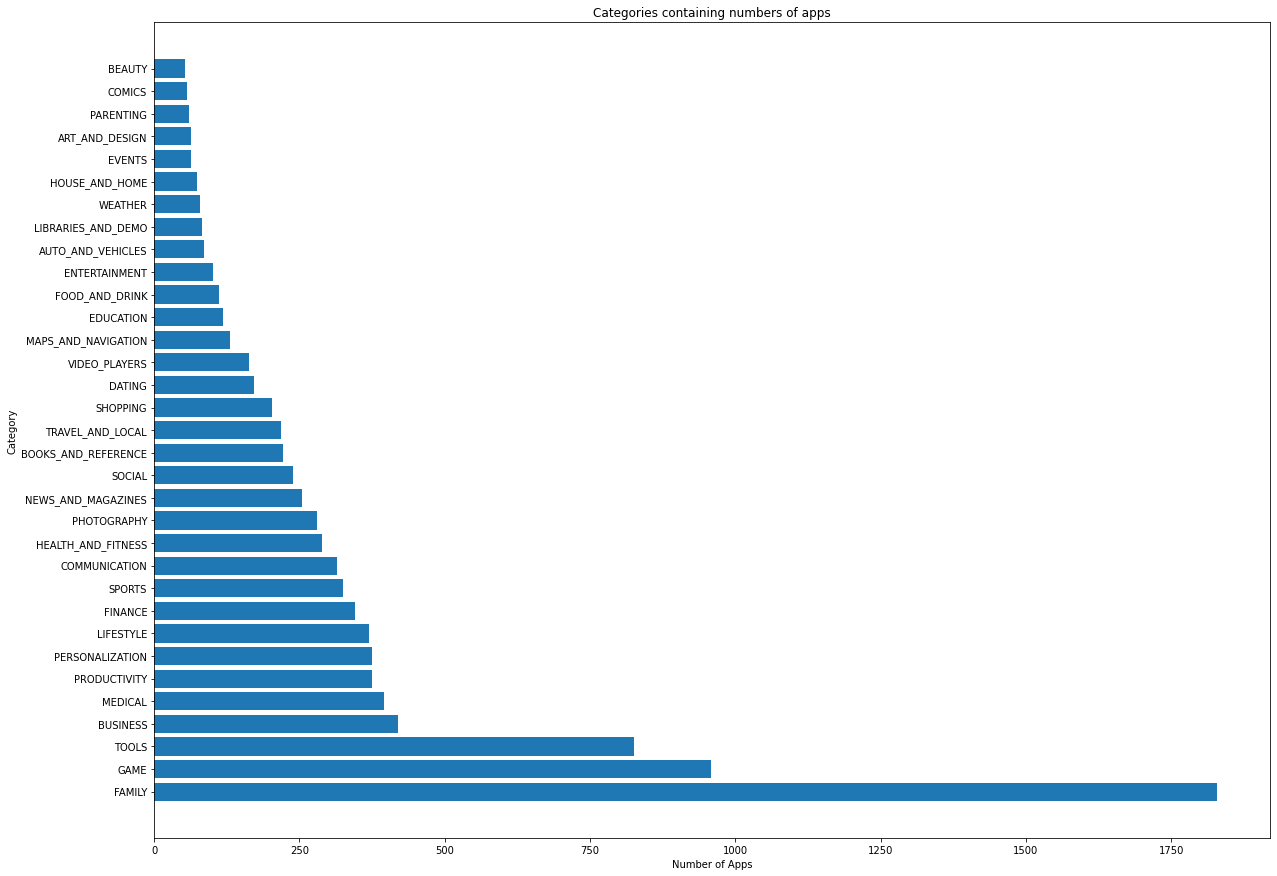

In [89]:
# Chart - 1 visualization code
# Top catagory containing apps
figure=plt.figure(figsize=(20,15))
s=playstore_df['Category'].value_counts()
yaxis=list(s.index)
xaxis=list(s)
plt.barh(yaxis,xaxis)
plt.title('Categories containing numbers of apps')
plt.ylabel('Category')
plt.xlabel('Number of Apps')
plt.show()

##### 1. Why did you pick the specific chart?

we pick this chat to know what are the top category containing the higst number of Apps

##### 2. What is/are the insight(s) found from the chart?

From the above graph, we found that the top five categories which have the highest no __Apps__ are Family, Games, Tools, Business, and medical sector

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes, the insights we found created a positive business impact.

- looking at the above graph we can say that in the google play store, there are the highest number of  apps in the family category and the lowest number of apps in the beauty category 

In [90]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   int64         
 4   Size            9649 non-null   object        
 5   Installs        9649 non-null   int64         
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 1.0+ MB


#### Chart - 2

Text(0.5, 1.0, 'visualize the avg rating of apps')

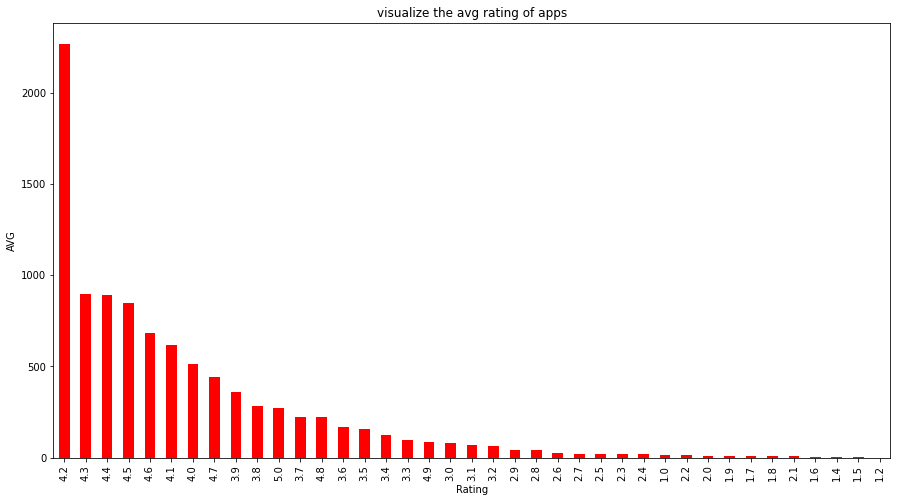

In [91]:
# Chart - 2 visualization code
# visualize the avg rating of apps
playstore_df.Rating.value_counts().plot.bar(color='red',figsize=(15,8))
plt.xlabel('Rating')
plt.ylabel('AVG')
plt.title("visualize the avg rating of apps")

##### 1. Why did you pick the specific chart?

This graph shows us a number of ratings for apps present in the play store Dataframe

##### 2. What is/are the insight(s) found from the chart?

From this graph we found that many people give 4.3 and 4.4 ratings to many apps and very less people give 1.2,1.5 and 1.4 rating, Here 4.2 can't consider cause it is the mean which we replace with null values


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can clearly see that most of the apps have got an average rating of 4.3 that means most of the apps have a good rating

In [92]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   int64         
 4   Size            9649 non-null   object        
 5   Installs        9649 non-null   int64         
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 1.0+ MB


#### Chart - 3

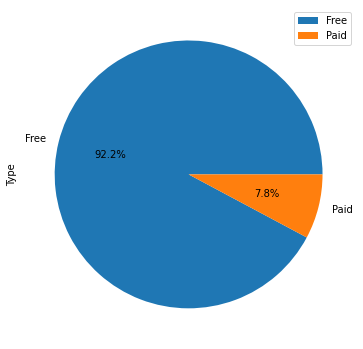

In [93]:
# Chart - 3 visualization code
# visualize how many free and paid version are there
playstore_df.Type.value_counts().plot.pie(figsize=(6,12),autopct='%1.1f%%')
plt.legend(loc='upper right')

##### 1. Why did you pick the specific chart?

This pie chart gives us how many free and paid types of apps are there

##### 2. What is/are the insight(s) found from the chart?

From the above pie chart, we found in the play store  data set that 92.2% of apps are free type and the other 7.8% are paid type

#### Chart - 4

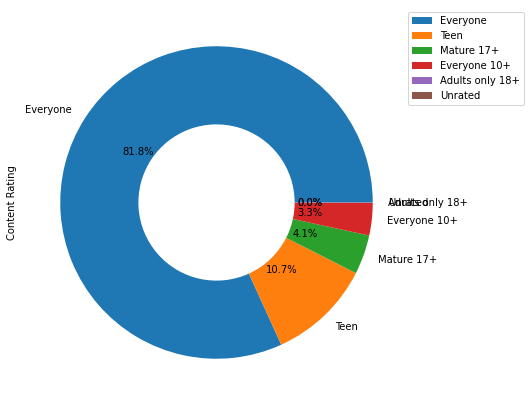

In [94]:
# Chart - 4 visualization code
#visualizing the content rating columns
playstore_df['Content Rating'].value_counts().plot.pie(figsize=(7,12),wedgeprops={'width':0.5},autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.3,1),loc='upper right')


##### 1. Why did you pick the specific chart?

we pick this Donut chart to visualize the __'Content Rating'__ column

##### 2. What is/are the insight(s) found from the chart?

Hence, We can clearly see majority of apps can be used by everyone

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

Text(0.5, 1.0, 'visualize the highest AVG Install ')

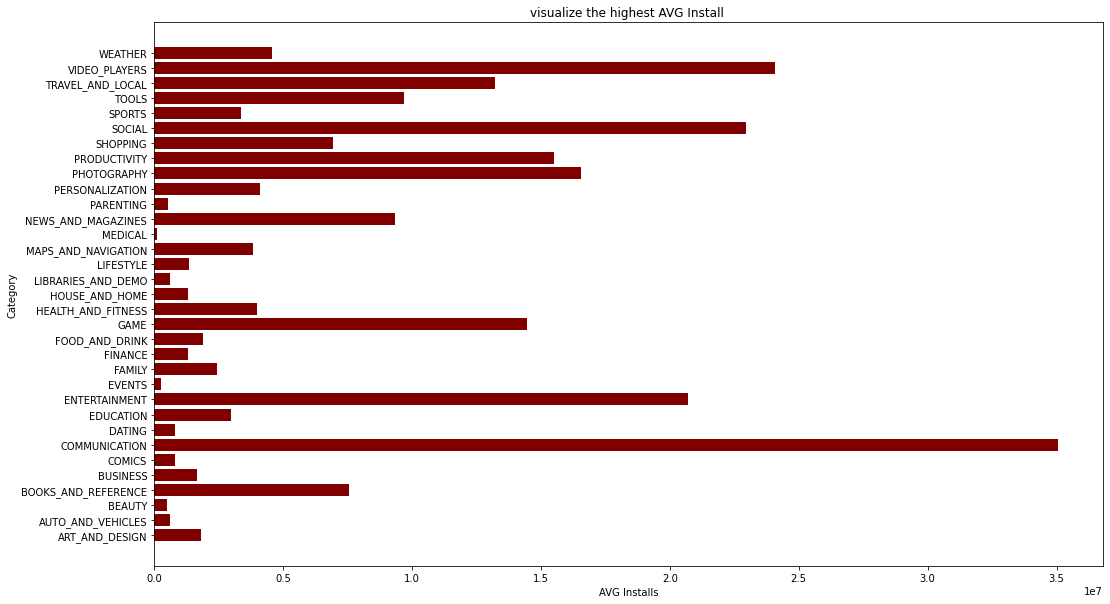

In [95]:
# Chart - 5 visualization code
s=playstore_df.groupby('Category').Installs.mean()
figure=plt.figure(figsize=(17,10))
plt.barh(s.index,s,color='maroon')
plt.xlabel('AVG Installs')
plt.ylabel('Category')
plt.title("visualize the highest AVG Install ")

##### 1. Why did you pick the specific chart?

we pick this graph to know which category have highest Average number of Installs

##### 2. What is/are the insight(s) found from the chart?

This shows us that ThevCommunication,video_playerand social  categories has the highest number of installs



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [96]:
# Chart - 6 visualization code
df=playstore_df.sort_values(by=['Installs'],ascending=False)
df[df.Installs==df.Installs.max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3736,Google News,NEWS_AND_MAGAZINES,3.9,877635,13.0,1000000000,Free,0.0,Teen,News & Magazines,2018-08-01,5.2.0,4.4 and up
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,Varies with device,1000000000,Free,0.0,Everyone,Travel & Local,2018-07-31,Varies with device,Varies with device
3127,Google Street View,TRAVEL_AND_LOCAL,4.2,2129689,Varies with device,1000000000,Free,0.0,Everyone,Travel & Local,2018-08-06,Varies with device,Varies with device
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,Varies with device,1000000000,Free,0.0,Teen,Video Players & Editors,2018-08-02,Varies with device,Varies with device
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,Varies with device,1000000000,Free,0.0,Teen,Video Players & Editors,2018-08-06,Varies with device,Varies with device
2554,Google+,SOCIAL,4.2,4831125,Varies with device,1000000000,Free,0.0,Teen,Social,2018-07-26,Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device
3234,Google,TOOLS,4.4,8033493,Varies with device,1000000000,Free,0.0,Everyone,Tools,2018-08-03,Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1000000000,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/style.py:271: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  conv.to_rgba(color)


Text(0.5, 1.0, 'visualize the Top 20 apps According to Installs')

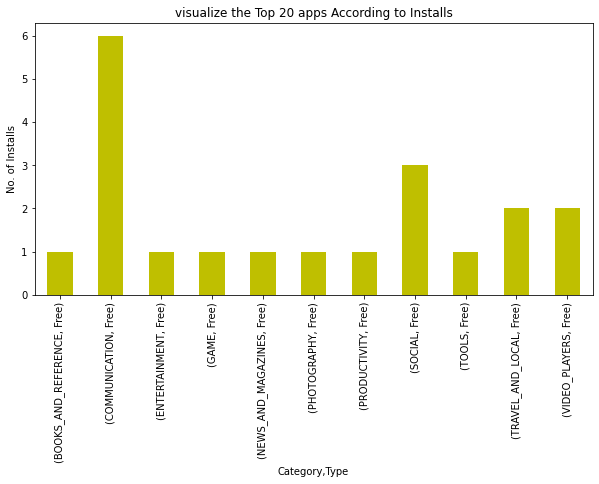

In [97]:
df[df.Installs==df.Installs.max()].groupby('Category').Type.value_counts().plot.bar(figsize=(10,5),color='Y')
plt.ylabel('No. of Installs')
plt.title("visualize the Top 20 apps According to Installs")

##### 1. Why did you pick the specific chart?

To know the top 20 apps are from which category and which type

##### 2. What is/are the insight(s) found from the chart?

According to the number of installs the top 20 apps are free type and many of them are from Communication category

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [98]:
# Chart - 7 visualization code
type_paid=playstore_df[playstore_df.Type=='Paid']
type_paid.shape

(753, 13)

Text(0.5, 1.0, 'visualize the no.of apps Acc. to Price')

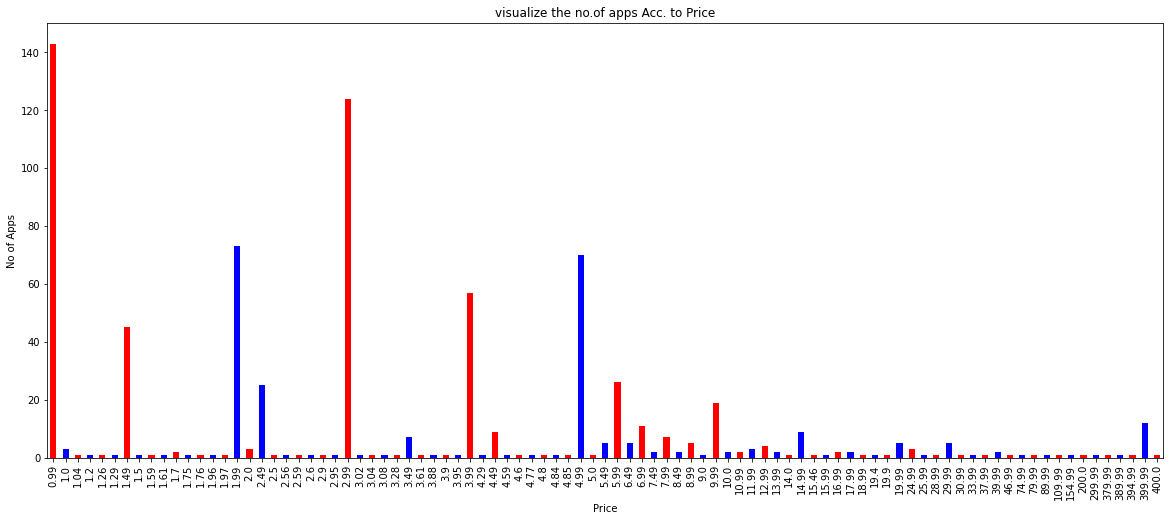

In [99]:
type_paid.groupby('Price')['App'].count().plot.bar(figsize=(20,8),color=['R','b'])
plt.xlabel('Price')
plt.ylabel('No of Apps')
plt.title("visualize the no.of apps Acc. to Price")

##### 1. Why did you pick the specific chart?

To know the highest number of apps present in which price range

##### 2. What is/are the insight(s) found from the chart?

From above Plot we conclude that from paid type apps highest number of apps are 0.99 and 2.99$

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

<ipython-input-100-aac43e84dba7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_paid['Revenue']=type_paid.Installs*type_paid.Price


Text(0, 0.5, 'AVG Revenue')

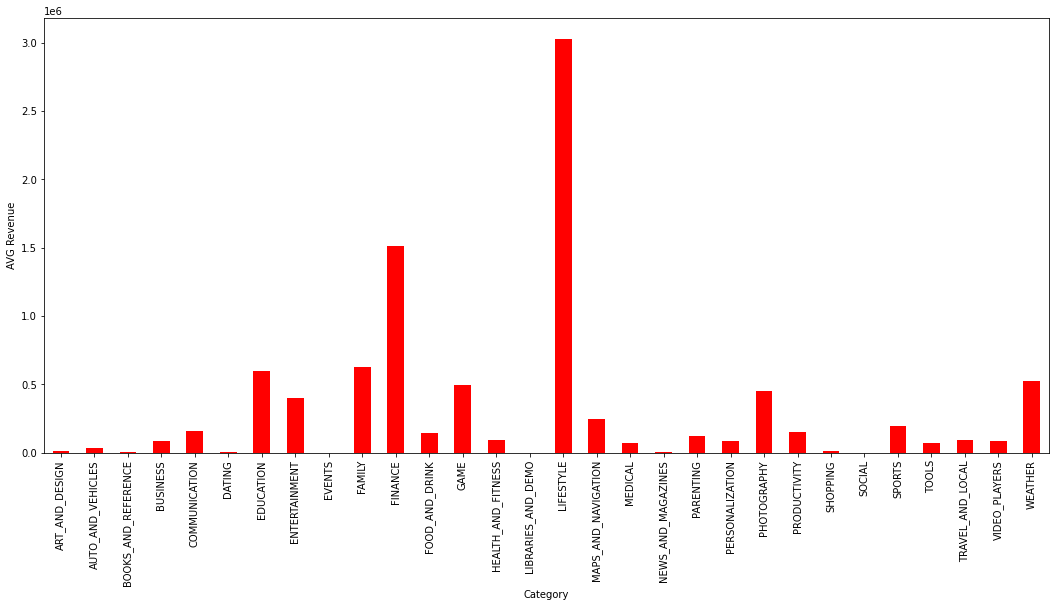

In [100]:
# Chart - 8 visualization code
type_paid['Revenue']=type_paid.Installs*type_paid.Price
type_paid.groupby('Category')['Revenue'].mean().plot.bar(figsize=(18,8),color='r')
plt.ylabel('AVG Revenue')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

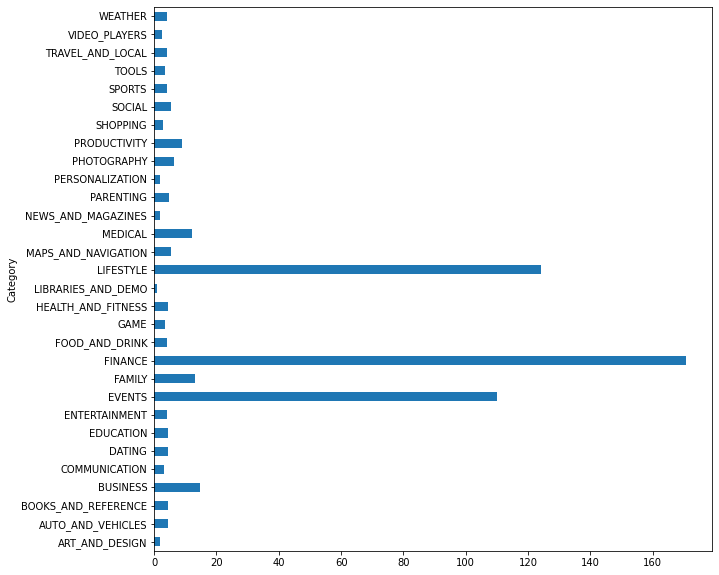

In [101]:
# Chart - 9 visualization code
type_paid.groupby('Category').Price.mean().plot.barh(figsize=(10,10))

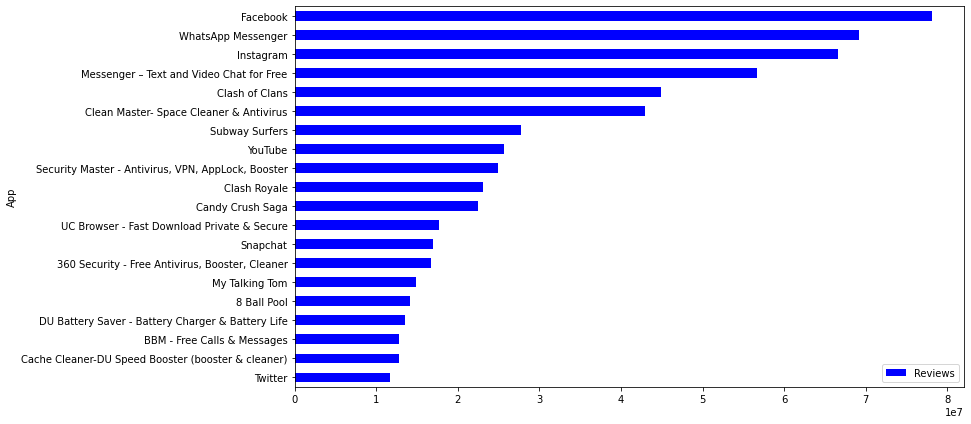

In [102]:
playstore_df.groupby('App')[['Reviews','App']].sum().nlargest(20,['Reviews']).plot.barh(figsize = (12,7), color = 'blue').invert_yaxis()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [103]:
# Chart - 10 visualization code
# Function to group the apps based on its size in MB

def group_size(size):
 
  try:
    if size < 1:
      return 'Below 1'
    elif size >= 1 and size <10:
      return '1-10'
    elif size >= 10 and size <20:
      return '10-20'
    elif size >= 20 and size <30:
      return '20-30'
    elif size >= 30 and size <40:
      return '30-40'
    elif size >= 40 and size <50:
      return '40-50'
    elif size >= 50 and size <60:
      return '50-60'
    elif size >= 60 and size <70:
      return '60-70'
    elif size >= 70 and size <80:
      return '70-80'
    elif size >= 80 and size <90:
      return '80-90'
    else:
      return '90 and above'
  except:
    return size
#userreview_df.info()

In [104]:
playstore_df['Groupsize']=playstore_df.Size.apply(lambda x: group_size(x))
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Groupsize
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,10-20
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,10-20
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1-10
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,20-30
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,1-10


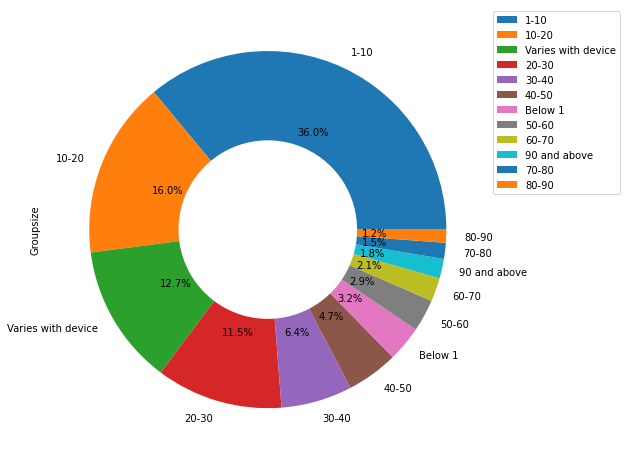

In [105]:
playstore_df.Groupsize.value_counts().plot.pie(figsize=(8,10),wedgeprops={'width':0.5},autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.3,1) ,loc='upper right')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

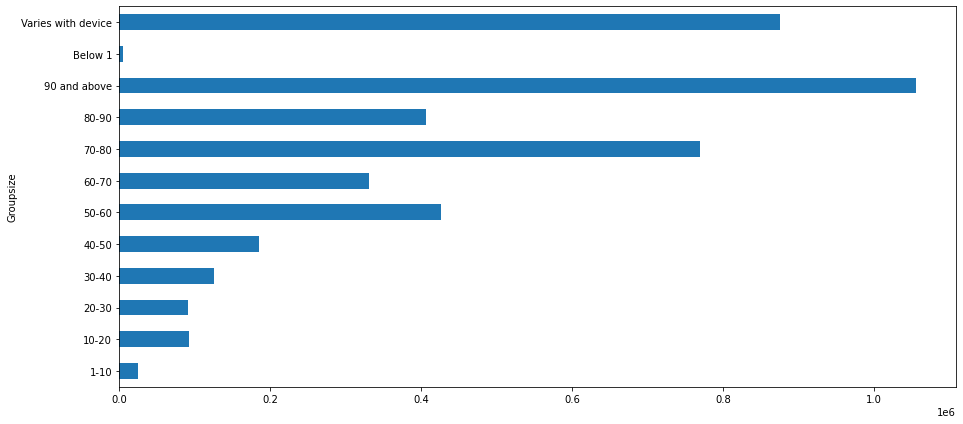

In [106]:
playstore_df.groupby('Groupsize').Reviews.mean().plot.barh(figsize=(15,7))


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/style.py:271: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  conv.to_rgba(color)


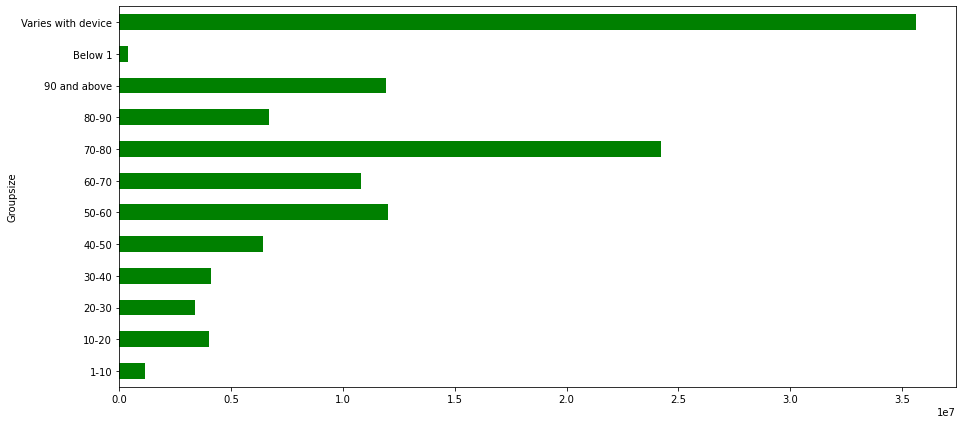

In [107]:
playstore_df.groupby('Groupsize').Installs.mean().plot.barh(figsize=(15,7),color='G')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

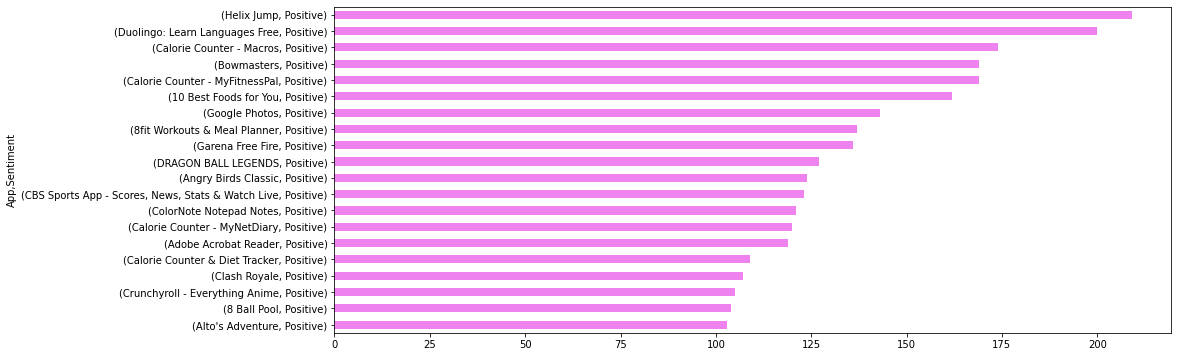

In [108]:
# Chart - 12 visualization code
positive_df=userreview_df[userreview_df.Sentiment=='Positive']
positive_df.groupby('App').Sentiment.value_counts().nlargest(20).plot.barh(figsize=(15,6),color='violet').invert_yaxis()

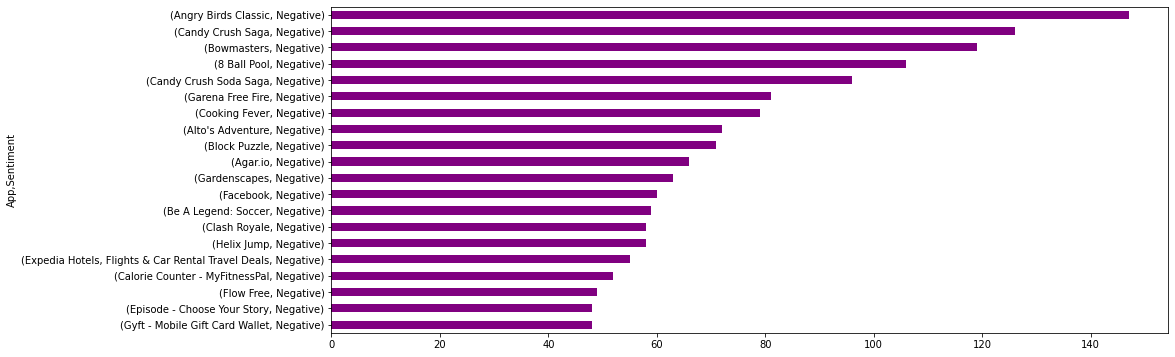

In [109]:
negative_df=userreview_df[userreview_df.Sentiment=='Negative']
negative_df.groupby('App').Sentiment.value_counts().nlargest(20).plot.barh(figsize=(15,6),color='purple').invert_yaxis()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

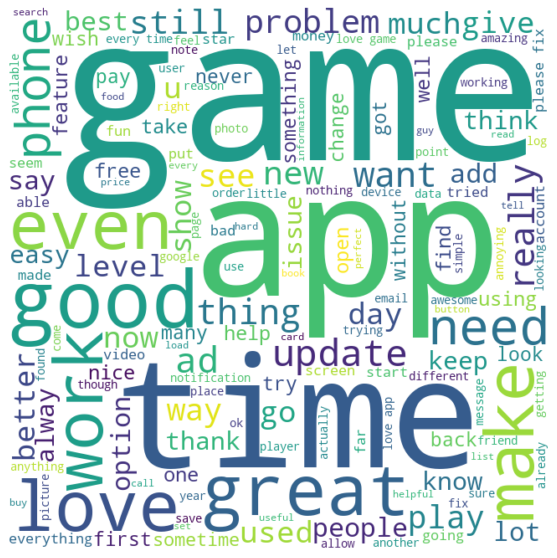

In [110]:
# Chart - 13 visualization code
string=''
stop_word=set(STOPWORDS)
for review in userreview_df.Translated_Review.values:
  review=str(review).lower()
  string+=''.join(review)
wordcloud=WordCloud(width = 650, height = 650,
                background_color ='white',
                stopwords = stop_word,
                min_font_size = 12).generate(string)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

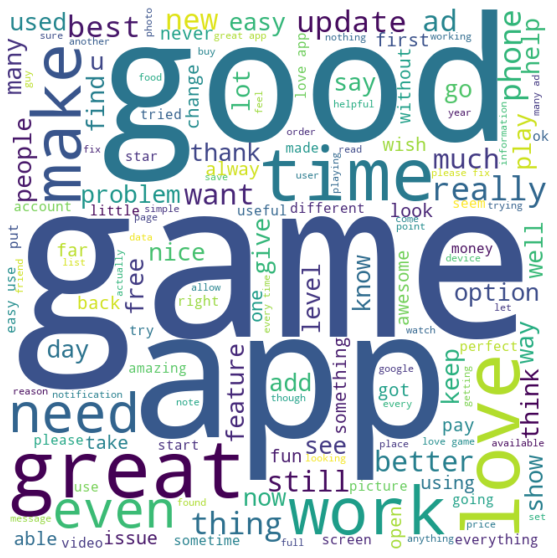

In [111]:
pos_string=''
stop_word=set(STOPWORDS)
for pos_review in positive_df.Translated_Review.values:
  pos_review=str(pos_review).lower()
  pos_string+=''.join(pos_review)
wordcloud=WordCloud(width = 650, height = 650,
                background_color ='white',
                stopwords = stop_word,
                min_font_size = 12).generate(pos_string)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

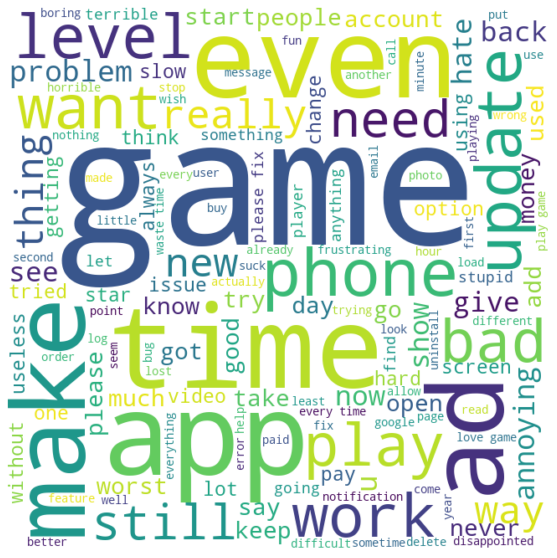

In [112]:
neg_string=''
stop_word=set(STOPWORDS)
for neg_review in negative_df.Translated_Review.values:
  neg_review=str(neg_review).lower()
  neg_string+=''.join(neg_review)
wordcloud=WordCloud(width = 650, height = 650,
                background_color ='white',
                stopwords = stop_word,
                min_font_size = 12).generate(neg_string)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [113]:
# Correlation Heatmap visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [114]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***